# Moving Average Trends

In [52]:
import sys
sys.path.append('D:/source/repos')
import datetime
from utilities.std_imports import *
import lstf.Stocks.sp500_data as ssd
from ds_topics.utils.basic_methods import *
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima_model import ARIMA

In [7]:
def PlotMATrends(hist, mws):
    colors = ['mediumseagreen', 'green', 'darkgreen']
    Ma=[]
    for mw in mws:
        rolling = hist.rolling(window=mw, center=True)
        ma = rolling.mean()
        Ma.append(ma)
   
    plt.figure(figsize=(20, 10))
    plt.plot(hist, color='darkslateblue', linewidth=2)
    for i in range(len(Ma)):
        plt.plot(Ma[i], color=colors[i])
    plt.title(ticker)
    plt.show()

In [8]:
ticker='MSFT'
hist = ssd.LoadStock_data(ticker)

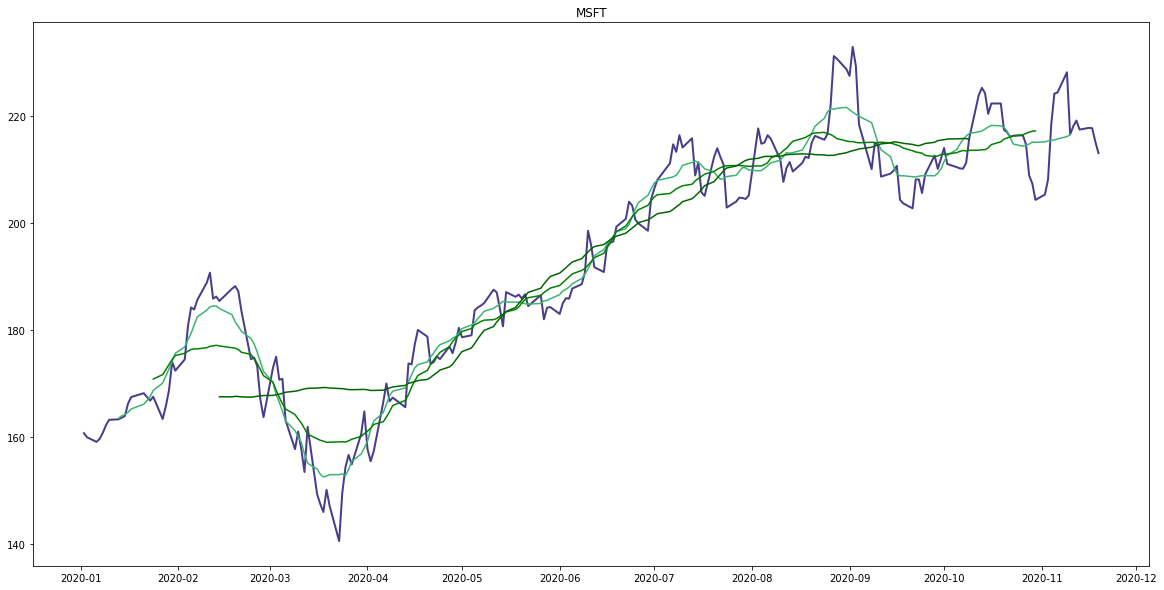

In [38]:
PlotMATrends(hist, mws=[15,30,60])

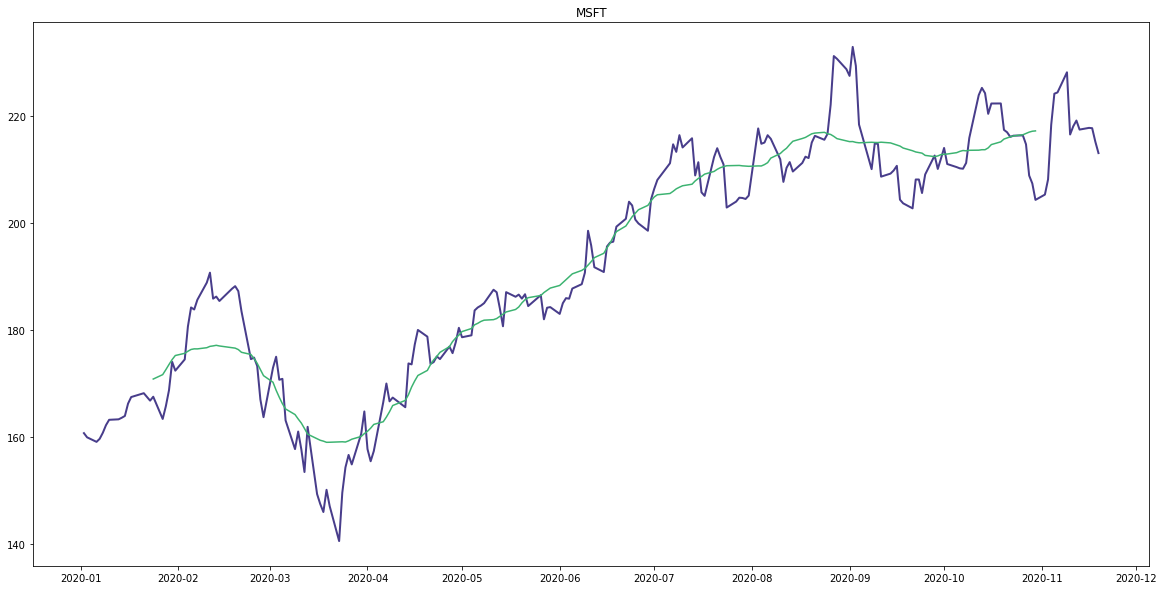

In [39]:
PlotMATrends(hist, mws=[30])

In [40]:
def GetFcst(hist, horizon):
    fcst = HoltWintersLin(ts=hist, hor=horizon, sl=0.3, ss=0.1)
    date = hist.index[len(hist)-1]
    dt = pd.date_range(date, periods = horizon+1, freq = 'd')
    fcst = [hist[len(hist)-1], *fcst]
    fcst_ts = pd.Series(fcst)
    fcst_ts.index = dt
    return fcst_ts

In [43]:
def OscillationChart(hist, fcst, expiration, greenLims, redLims):
    with plt.style.context('seaborn'):
        plt.figure(figsize=(20, 10))
        plt.plot(hist, color='darkslateblue', linewidth=2)
        plt.plot(fcst, ls='--', color='navy')
        plt.axhline(y=redLims[0], ls='--', color='lightcoral')
        plt.axhline(y=redLims[1], ls='--', color='lightcoral')
        plt.axhline(y=greenLims[0], ls='--', color='mediumseagreen')
        plt.axhline(y=greenLims[1], ls='--', color='mediumseagreen')
        plt.axvline(x=expiration, ls='-', color='lightgray', label='idm');

C:\Program Files\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Program Files\Python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
D:\source\repos\ds_topics\utils\basic_methods.py:38: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit = Holt(ts).fit(smoothing_level = sl,smoothing_slope = ss)
C:\Program Files\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


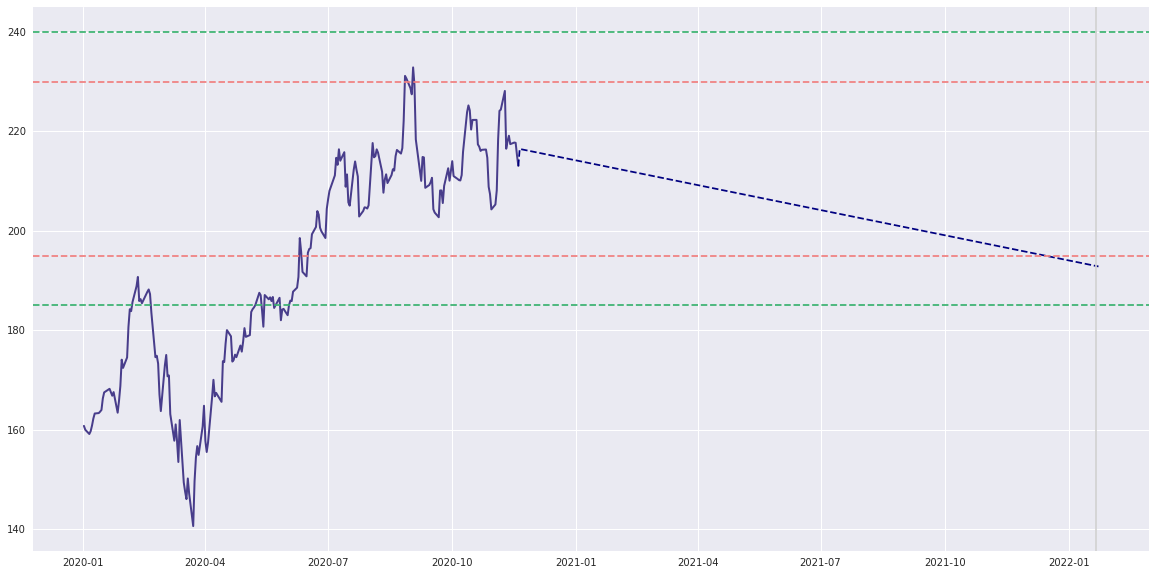

In [69]:
fcst = GetFcst(hist=hist, horizon=430)
OscillationChart(hist=hist, fcst=fcst, expiration='2022-01-21', greenLims=(185,240), redLims=(195,230))

In [34]:
fcst = GetFcst(hist=hist, horizon=60)
fcst

C:\Program Files\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Program Files\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


DatetimeIndex(['2020-11-19', '2020-11-20', '2020-11-21', '2020-11-22',
               '2020-11-23', '2020-11-24', '2020-11-25', '2020-11-26',
               '2020-11-27', '2020-11-28', '2020-11-29', '2020-11-30',
               '2020-12-01', '2020-12-02', '2020-12-03', '2020-12-04',
               '2020-12-05', '2020-12-06', '2020-12-07', '2020-12-08',
               '2020-12-09', '2020-12-10', '2020-12-11', '2020-12-12',
               '2020-12-13', '2020-12-14', '2020-12-15', '2020-12-16',
               '2020-12-17', '2020-12-18', '2020-12-19', '2020-12-20',
               '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24',
               '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28',
               '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-01',
               '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
               '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09',
               '2021-01-10', '2021-01-11', '2021-01-12', '2021-01-13',
      

C:\Program Files\Python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Program Files\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequen

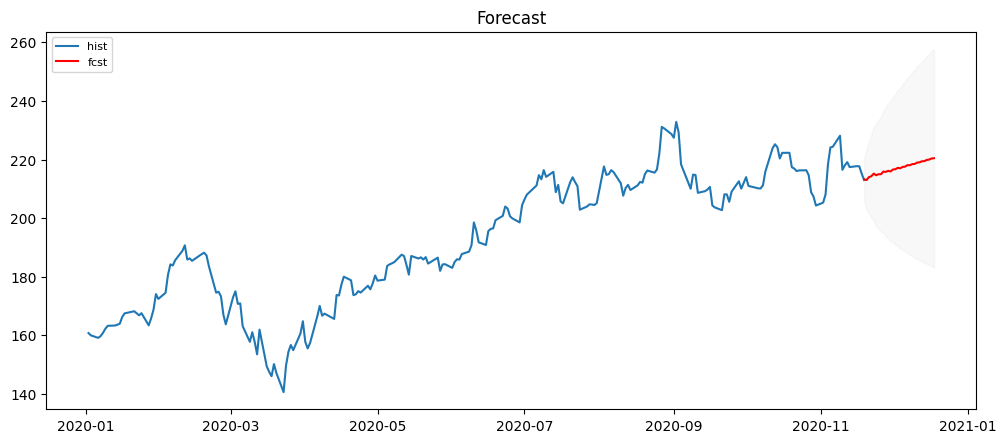

In [64]:
horizon=30
dt = pd.date_range(date, periods = horizon, freq = 'd')
model = ARIMA(hist, order=(3, 1, 6))  
fitted = model.fit(disp=-1)  
fcst, se, conf = fitted.forecast(horizon, alpha=0.05)  # 95% conf

# Make as pandas series
fcst = pd.Series(fcst, index=dt)
lwr = pd.Series(conf[:, 0], index=dt)
upr = pd.Series(conf[:, 1], index=dt)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(hist, label='hist')
plt.plot(fcst, label='fcst', color='red')
plt.fill_between(lwr.index, lwr, upr, color='lightgray', alpha=.15)
plt.title('Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()